In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
df = pd.read_csv("/Users/hamzaasad/Desktop/data/adult23csv/adult23.csv")

In [3]:
df.columns

Index(['URBRRL', 'RATCAT_A', 'INCTCFLG_A', 'IMPINCFLG_A', 'LANGSPECR_A',
       'LANGSOC_A', 'LANGDOC_A', 'LANGMED_A', 'LANGHM_A', 'PPSU',
       ...
       'PROXYREL_A', 'PROXY_A', 'AVAIL_A', 'HHSTAT_A', 'INTV_MON', 'RECTYPE',
       'IMPNUM_A', 'WTFA_A', 'HHX', 'POVRATTC_A'],
      dtype='object', length=647)

In [4]:
df.head()

,URBRRL,RATCAT_A,INCTCFLG_A,IMPINCFLG_A,LANGSPECR_A,LANGSOC_A,LANGDOC_A,LANGMED_A,LANGHM_A,PPSU,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,HHX,POVRATTC_A
0,3,4,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,7371.139,H029691,1.01
1,4,8,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,3146.794,H028812,2.49
2,4,14,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,10807.558,H045277,6.73
3,4,10,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,4661.643,H021192,3.43
4,4,5,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,10929.554,H025576,1.27


In [5]:
# Check for columns with constant values and dropping them
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df.drop(constant_columns, axis=1, inplace=True )
print(f"Constant columns: {constant_columns}")

Constant columns: ['HHRESPSA_FLG', 'MAFLG_A', 'PRFLG_A', 'PRPLCOV1_C_A', 'PRPLCOV2_C_A', 'SRVY_YR', 'CHHDHP_A', 'HHSTAT_A', 'RECTYPE', 'IMPNUM_A']


In [6]:
# Check for missing values in each feature
missing_data = df.isnull().sum() / len(df) * 100  # Percentage of missing data
print(missing_data[missing_data > 0])  # Features with missing data > 0%

LANGSPECR_A    86.284805
LANGSOC_A      86.542240
LANGDOC_A      86.284805
LANGMED_A      86.284805
LANGHM_A       25.127024
                 ...    
HYPMED_A       62.421245
HYP12M_A       67.823996
HYPDIF_A       62.421245
PROXYREL_A     98.181018
PROXY_A        98.126821
Length: 434, dtype: float64


In [7]:
# # Set a more reasonable threshold (e.g., 50% missing data)
# threshold = 50
# columns_to_drop = missing_data[missing_data > threshold].index

# # Drop those columns
# df.drop(columns=columns_to_drop, axis=1, inplace=True)

# # Check the remaining columns
# print(df.columns)


In [8]:
# Step 1: Drop constant columns
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df.drop(constant_columns, axis=1, inplace=True)
print(f"Constant columns dropped: {constant_columns}")

# Step 2: Recompute missing data after dropping constant columns
missing_data = df.isnull().sum() / len(df) * 100  # Percentage of missing data
print(f"Missing data after dropping constant columns:\n{missing_data[missing_data > 0]}")

# Step 3: Drop columns with more than 50% missing data
threshold = 50
columns_to_drop = missing_data[missing_data > threshold].index
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Step 4: Print the remaining columns
print(f"Remaining columns after dropping columns with more than 50% missing data:\n{df.columns}")


Constant columns dropped: []
Missing data after dropping constant columns:
LANGSPECR_A    86.284805
LANGSOC_A      86.542240
LANGDOC_A      86.284805
LANGMED_A      86.284805
LANGHM_A       25.127024
                 ...    
HYPMED_A       62.421245
HYP12M_A       67.823996
HYPDIF_A       62.421245
PROXYREL_A     98.181018
PROXY_A        98.126821
Length: 434, dtype: float64
Remaining columns after dropping columns with more than 50% missing data:
Index(['URBRRL', 'RATCAT_A', 'INCTCFLG_A', 'IMPINCFLG_A', 'LANGHM_A', 'PPSU',
       'PSTRAT', 'HISPALLP_A', 'RACEALLP_A', 'DISAB3_A',
       ...
       'CHDEV_A', 'CHLEV_A', 'HYPEV_A', 'LSATIS4_A', 'PHSTAT_A', 'AVAIL_A',
       'INTV_MON', 'WTFA_A', 'HHX', 'POVRATTC_A'],
      dtype='object', length=289)


In [9]:
#Fill in the Missing Data

# Identify numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns


In [10]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')  # or 'median' depending on your data
df[numeric_columns] = num_imputer.fit_transform(df[numeric_columns])

# Impute missing values for categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

# Check for any remaining missing data
print(df.isnull().sum())


URBRRL         0
RATCAT_A       0
INCTCFLG_A     0
IMPINCFLG_A    0
LANGHM_A       0
              ..
AVAIL_A        0
INTV_MON       0
WTFA_A         0
HHX            0
POVRATTC_A     0
Length: 289, dtype: int64


In [11]:
# Check if any missing values remain
print(df.isnull().sum())


URBRRL         0
RATCAT_A       0
INCTCFLG_A     0
IMPINCFLG_A    0
LANGHM_A       0
              ..
AVAIL_A        0
INTV_MON       0
WTFA_A         0
HHX            0
POVRATTC_A     0
Length: 289, dtype: int64


In [12]:
# Check for columns with high cardinality (e.g., if number of unique values is too large)
# Identify high cardinality columns (more than 100 unique values)
high_cardinality_columns = [col for col in df.columns if df[col].nunique() > 100]

# Drop the high cardinality columns in-place
df.drop(columns=high_cardinality_columns, axis=1, inplace=True)

# Verify the columns have been dropped
print(f"Remaining columns after dropping high cardinality columns: {df.columns}")



Remaining columns after dropping high cardinality columns: Index(['URBRRL', 'RATCAT_A', 'INCTCFLG_A', 'IMPINCFLG_A', 'LANGHM_A', 'PSTRAT',
       'HISPALLP_A', 'RACEALLP_A', 'DISAB3_A', 'AFNOW',
       ...
       'STREV_A', 'MIEV_A', 'ANGEV_A', 'CHDEV_A', 'CHLEV_A', 'HYPEV_A',
       'LSATIS4_A', 'PHSTAT_A', 'AVAIL_A', 'INTV_MON'],
      dtype='object', length=284)


In [13]:
df.head()

,URBRRL,RATCAT_A,INCTCFLG_A,IMPINCFLG_A,LANGHM_A,PSTRAT,HISPALLP_A,RACEALLP_A,DISAB3_A,AFNOW,...,STREV_A,MIEV_A,ANGEV_A,CHDEV_A,CHLEV_A,HYPEV_A,LSATIS4_A,PHSTAT_A,AVAIL_A,INTV_MON
0,3.0,4.0,0.0,0.0,2.063563,103.0,3.0,2.0,1.0,2.000000,...,1.0,2.0,2.0,2.0,1.0,1.0,2.0,5.0,1.0,1.0
1,4.0,8.0,0.0,0.0,2.063563,122.0,2.0,1.0,2.0,1.990291,...,2.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0,1.0,1.0
2,4.0,14.0,0.0,0.0,2.063563,122.0,3.0,2.0,2.0,2.000000,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
3,4.0,10.0,0.0,0.0,2.063563,122.0,2.0,1.0,2.0,1.000000,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
4,4.0,5.0,0.0,0.0,2.063563,122.0,2.0,1.0,2.0,2.000000,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0


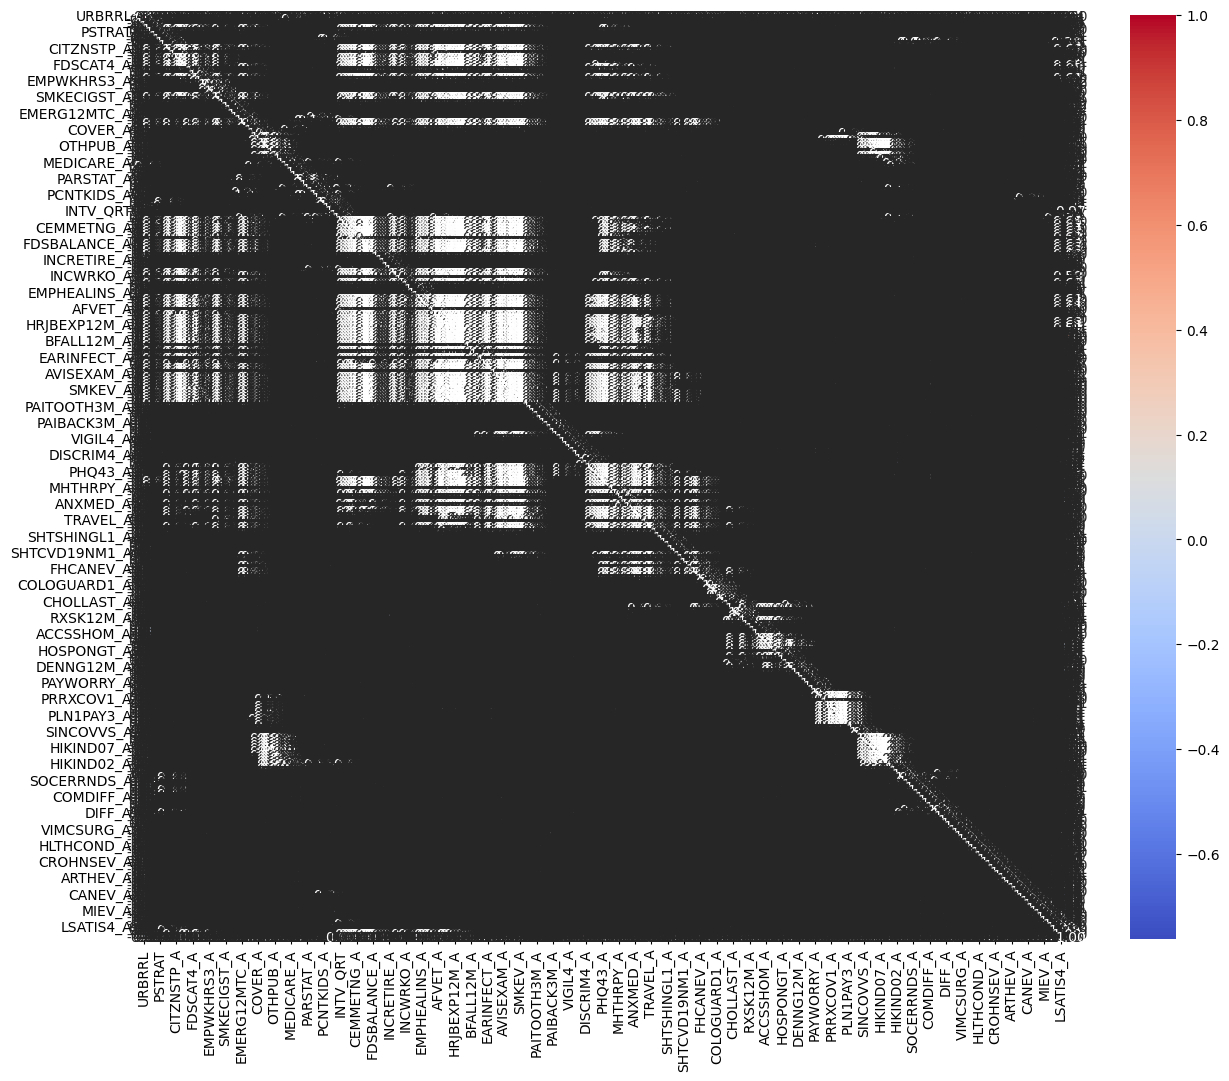

Highly correlated features: {'VIMREAD_A', 'CIGAREV_A', 'MHTHRPY_A', 'PLN1PAY5_A', 'EARINFECT_A', 'EMPLASTWK_A', 'ANXMED_A', 'HOUSECOST_A', 'PLN1PAY1_A', 'INTV_MON', 'MHTHDLY_A', 'FDSCAT3_A', 'SCHCURENR_A', 'HIKIND05_A', 'GAD2SCREEN_A', 'HRJBEXP12M_A', 'ANYINJURY_A', 'TBILCDCMG_A', 'THERA12M_A', 'CEMMETNG_A', 'ECIGEV_A', 'SMKEV_A', 'HIKIND07_A', 'ASTATNEW', 'PCNTKIDS_A', 'MEDDL12M_A', 'TRANSPOR_A', 'PCNTADLT_A', 'FDSBALANCE_A', 'HIKIND09_A', 'PLN1PAY2_A', 'HIKIND08_A', 'CHIP_A', 'HRJBEXPTB_A', 'PCNTADWKP1_A', 'HRVLOUD12M_A', 'REPSTRAIN_A', 'FDSRUNOUT_A', 'NATUSBORN_A', 'PLN1PAY3_A', 'PIPEEV_A', 'PLN1PAY4_A', 'TBIHLSBMC_A', 'FDSLAST_A', 'SAPARENTSC_A', 'IHS_A', 'AFVET_A'}


In [14]:
###Feature Selection Process
#Correlation Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numerical features
corr_matrix = df.corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.show()

# Identify highly correlated features (> 0.9)
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(f"Highly correlated features: {correlated_features}")

# Drop highly correlated features
# df.drop(columns=correlated_features, axis=1, inplace=True)



In [18]:
# Drop highly correlated features
df.drop(columns=correlated_features, axis=1, inplace=True)

# Verify remaining columns
print(f"Remaining columns after dropping correlated features: {df.columns}")


Remaining columns after dropping correlated features: Index(['URBRRL', 'RATCAT_A', 'INCTCFLG_A', 'IMPINCFLG_A', 'LANGHM_A', 'PSTRAT',
       'HISPALLP_A', 'RACEALLP_A', 'DISAB3_A', 'AFNOW',
       ...
       'ASPMEDEV_A', 'STREV_A', 'MIEV_A', 'ANGEV_A', 'CHDEV_A', 'CHLEV_A',
       'HYPEV_A', 'LSATIS4_A', 'PHSTAT_A', 'AVAIL_A'],
      dtype='object', length=237)


In [19]:
#Univariate Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Assuming 'CHDEV' is the target column for heart disease prediction
X = df.drop(columns=['CHDEV_A'])
y = df['CHDEV_A']

# Apply SelectKBest
selector = SelectKBest(f_classif, k=20)  # Select the top 20 features
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Top selected features: {selected_features}")


Top selected features: Index(['NUMCAN_A', 'VIMDREV_A', 'EPIEV_A', 'CFSEV_A', 'PSOREV_A', 'ULCCOLEV_A',
       'CROHNSEV_A', 'HEPEV_A', 'DEMENEV_A', 'COPDEV_A', 'DIBEV_A', 'PREDIB_A',
       'CANEV_A', 'ASPONOWN_A', 'ASPMEDEV_A', 'STREV_A', 'MIEV_A', 'ANGEV_A',
       'CHLEV_A', 'HYPEV_A'],
      dtype='object')


In [25]:
# Create new DataFrame with selected features and target variables
# df_selected = df[selected_features]
# Create a new DataFrame with selected features and target variable
selected = ['NUMCAN_A', 'VIMDREV_A', 'EPIEV_A', 'CFSEV_A', 'PSOREV_A',
                     'ULCCOLEV_A', 'CROHNSEV_A', 'HEPEV_A', 'DEMENEV_A', 'COPDEV_A',
                     'DIBEV_A', 'PREDIB_A', 'CANEV_A', 'ASPONOWN_A', 'ASPMEDEV_A',
                     'STREV_A', 'MIEV_A', 'ANGEV_A', 'CHLEV_A', 'HYPEV_A', 'CHDEV_A']

# Keep only the selected features and target
df_selected = df[selected]

# Verify the shape of the new dataset
print(f"Shape of the dataset after feature selection: {df_selected.shape}")


Shape of the dataset after feature selection: (29522, 21)


In [21]:
#optional feature selection
# #Recursive Feature Elimination (RFE)
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# # Initialize the model (Logistic Regression here)
# model = LogisticRegression(max_iter=1000)

# # Initialize RFE with the model and desired number of features to select (e.g., 20)
# rfe = RFE(model, n_features_to_select=20)

# # Fit RFE
# X_rfe = rfe.fit_transform(X, y)

# # Get the selected features
# selected_features_rfe = X.columns[rfe.support_]
# print(f"Features selected by RFE: {selected_features_rfe}")


In [ ]:

#Optional Feature Selection
# #Tree-based feature selection (Random forest or gradient boosting)
# from sklearn.ensemble import RandomForestClassifier

# # Train a RandomForestClassifier to get feature importances
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X, y)

# # Get feature importance
# feature_importances = model.feature_importances_

# # Create a DataFrame to display feature importance
# importance_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': feature_importances
# })

# # Sort by importance
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Display top 20 important features
# print(importance_df.head(20))


In [ ]:
#Opitonal Feature Selection
# #L1 Regularization (Lasso) for feature selection
# from sklearn.linear_model import LogisticRegressionCV

# # Use L1 regularization (Logistic Regression with Lasso)
# model = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=1000)
# model.fit(X, y)

# # Get the selected features based on non-zero coefficients
# selected_features_lasso = X.columns[model.coef_.flatten() != 0]
# print(f"Features selected by Lasso: {selected_features_lasso}")


In [ ]:
#M######MODEL BUILDING

In [26]:
df_selected.head()

,NUMCAN_A,VIMDREV_A,EPIEV_A,CFSEV_A,PSOREV_A,ULCCOLEV_A,CROHNSEV_A,HEPEV_A,DEMENEV_A,COPDEV_A,...,PREDIB_A,CANEV_A,ASPONOWN_A,ASPMEDEV_A,STREV_A,MIEV_A,ANGEV_A,CHLEV_A,HYPEV_A,CHDEV_A
0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,1.961262,1.0,1.0,2.0,2.0,1.0,1.0,2.0
1,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2.0,1.961262,1.0,2.0,1.0,2.0,2.0,1.0,1.0
2,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [27]:
#Split data for modle building

from sklearn.model_selection import train_test_split

# Define X and y
X = df_selected.drop(columns=['CHDEV_A'])
y = df_selected['CHDEV_A']

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (23617, 20)
Test data shape: (5905, 20)


In [28]:
#MODEL PIPELINES


In [29]:
#Logistic regression(classification)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train logistic regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate on test data
y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

         1.0       0.71      0.28      0.40       362
         2.0       0.95      0.99      0.97      5518
         7.0       1.00      0.62      0.77         8
         9.0       0.00      0.00      0.00        17

    accuracy                           0.95      5905
   macro avg       0.66      0.47      0.54      5905
weighted avg       0.93      0.95      0.93      5905



In [30]:
#SVM (Support vector machine)
from sklearn.svm import SVC

# Initialize and train SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Evaluate on test data
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

         1.0       0.64      0.35      0.45       362
         2.0       0.96      0.99      0.97      5518
         7.0       1.00      0.38      0.55         8
         9.0       0.00      0.00      0.00        17

    accuracy                           0.94      5905
   macro avg       0.65      0.43      0.49      5905
weighted avg       0.93      0.94      0.94      5905



/Users/hamzaasad/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hamzaasad/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hamzaasad/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [31]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize and train decision tree
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

# Evaluate on test data
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

         1.0       0.65      0.41      0.50       362
         2.0       0.96      0.99      0.97      5518
         7.0       1.00      0.75      0.86         8
         9.0       0.00      0.00      0.00        17

    accuracy                           0.95      5905
   macro avg       0.65      0.54      0.58      5905
weighted avg       0.94      0.95      0.94      5905



/Users/hamzaasad/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hamzaasad/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hamzaasad/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [32]:
#Neural Newtwork (MLP)
from sklearn.neural_network import MLPClassifier

# Initialize and train neural network
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_model.fit(X_train, y_train)

# Evaluate on test data
y_pred_mlp = mlp_model.predict(X_test)
print(classification_report(y_test, y_pred_mlp))


              precision    recall  f1-score   support

         1.0       0.58      0.43      0.49       362
         2.0       0.96      0.98      0.97      5518
         7.0       0.75      0.38      0.50         8
         9.0       0.00      0.00      0.00        17

    accuracy                           0.94      5905
   macro avg       0.57      0.45      0.49      5905
weighted avg       0.93      0.94      0.94      5905

